1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

In [2]:
df = pd.read_csv('data/usuarios_win_mac_lin.csv')
df.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


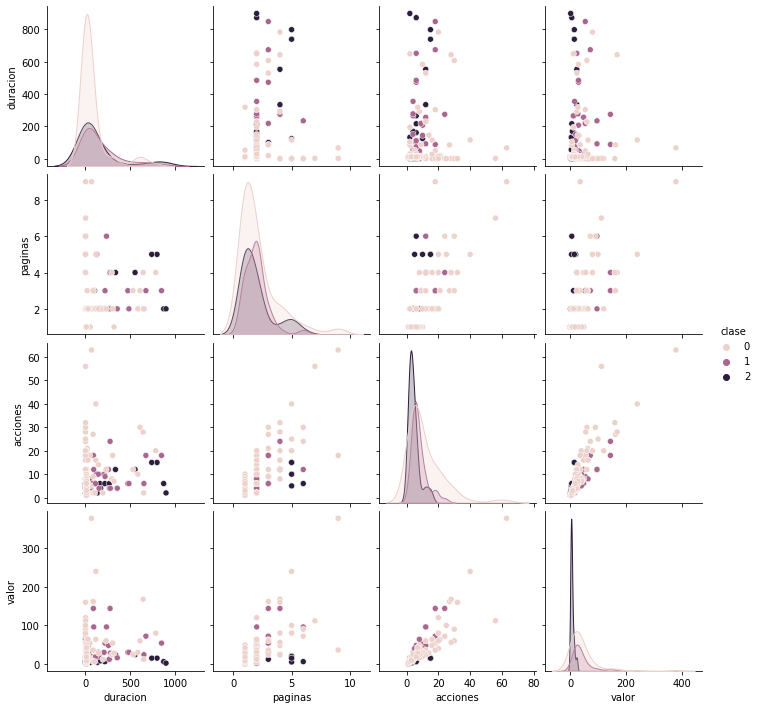

In [4]:
sns.pairplot(df, hue='clase');

In [5]:
X = df.drop('duracion', 1)
y = df.duracion

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
print(model.coef_)
print(model.intercept_)

[21.13634697 12.87425465 -2.04495721 46.67111192]
-16.379903159773306


In [10]:
y_pred = model.predict(X_test)

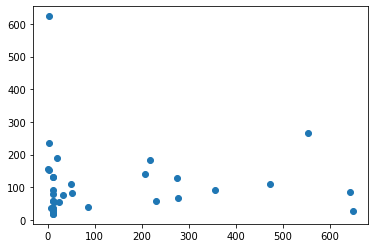

In [12]:
plt.scatter(y_test, y_pred)

In [14]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.14813704890209378
-0.317594520086516


In [17]:
# RMSE
mean_squared_error(y_test, y_pred)**(1/2)

220.65573239823075

In [18]:
np.sqrt(mean_squared_error(y_test, y_pred))

220.65573239823075

In [19]:
corr_matrix = df.corr()
corr_matrix

,duracion,paginas,acciones,valor,clase
duracion,1.000000,0.277550,0.163028,0.090869,0.128706
paginas,0.277550,1.000000,0.724061,0.583910,-0.052813
acciones,0.163028,0.724061,1.000000,0.862961,-0.329954
valor,0.090869,0.583910,0.862961,1.000000,-0.322737
clase,0.128706,-0.052813,-0.329954,-0.322737,1.000000


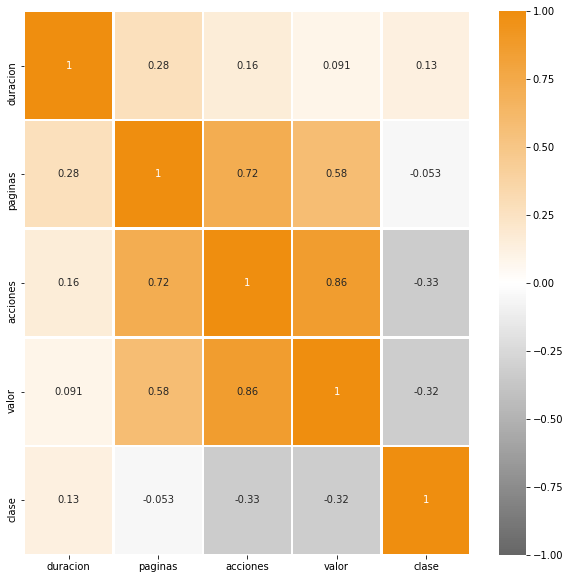

In [29]:
import matplotlib

# COLORES
ama ='#FADD1E' #AMARILLO
azul ='#1CB1C8' #AZUL
gris ='#666666'#GRIS
verdoscuro = '#6FBD3B' #VERDE OSCURO
naran ='#EF8E0F' #NARANJA
verdlima = '#BEDA05' #VERDE LIMA

mask = np.triu(np.ones_like(df.corr(), dtype=bool))
colors = [gris,'#FFFFFF', naran]
fig, ax = plt.subplots(figsize=(10,10))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
sns.heatmap(df.corr(),
            vmin=-1,
            vmax=1,
            annot=True, linewidths = 1.5,
            cmap=cmap, annot_kws={'size': 10}, ax=ax )
plt.show()

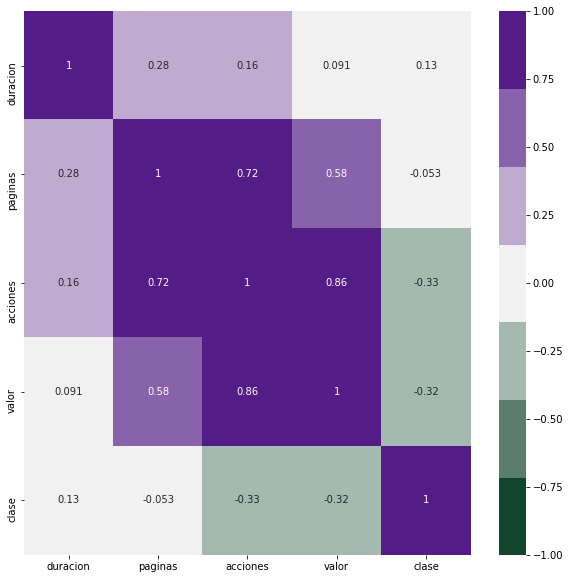

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
            cmap = sns.diverging_palette(148,280,s=85, l = 25, n=7),
            vmin = -1,
            vmax = 1,
            annot = True);